In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt


Приветствую! Посмотрим файл с перечнем московских улиц? Данные взяты отсюда: https://www.kaggle.com/datasets/caerno/moscow-streets?datasetId=2201909


In [9]:
df = pd.read_csv('mosgaz-streets.csv')
df

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4398 non-null   object
 1   areaid      4398 non-null   int64 
 2   okrug       4398 non-null   object
 3   area        4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


Итого у нас есть данные по названиям улиц, районов и округов.

Первый беглый анализ, посмотрим, сколько уникальных единиц в этих данных.

In [11]:
cuonts_unique = df.nunique().reset_index()
cuonts_unique

,index,0
0,streetname,3604
1,areaid,123
2,okrug,10
3,area,123


3604 улицы, в 123-х районах 10-ти округов.

А распределени количества улиц по районам выглядит вот так:

In [12]:
streets_in_area = df['area'].value_counts().reset_index()
streets_in_area

,index,area
0,Тверской район,179
1,Таганский район,173
2,Басманный район,152
3,Пресненский район,144
4,Район Хамовники,140
...,...,...
118,Район Чертаново Центральное,10
119,Район Чертаново Северное,9
120,Район Проспект Вернадского,8
121,Район Восточный,6


Больше всех улиц в Тверском районе, а меньше всего в Некрасовке.

А вот так выглядит распределение по количеству улиц среди районов:

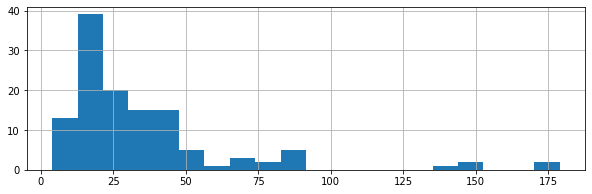

In [22]:
plt.figure(figsize =(10, 3))
plt.hist(streets_in_area['area'], bins = 20)
plt.grid()

Больше всего районов, где число улиц порядка 20.

In [17]:
streets_in_area.describe()

,area
count,123.000000
mean,35.756098
std,31.753234
min,4.000000
25%,17.000000
50%,26.000000
75%,41.000000
max,179.000000


Среднее количество улиц в районах также почти 36.

Посмотрим теперь на округа, сколько в них улиц:

In [19]:
streets_in_okrug = df['okrug'].value_counts().reset_index()
streets_in_okrug

,index,okrug
0,ЦАО,1200
1,ВАО,504
2,ЗАО,460
3,САО,410
4,СВАО,408
5,ЮВАО,382
6,ЮАО,372
7,ЮЗАО,289
8,СЗАО,252
9,Зеленоград,121


Самый большой округ - ЦАО, самый маленький - Зеленоград.

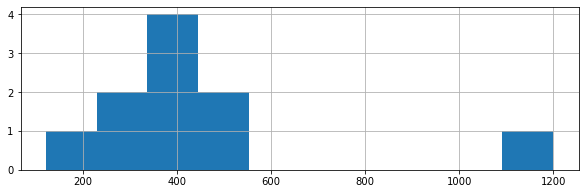

In [21]:
plt.figure(figsize =(10, 3))
plt.hist(streets_in_okrug['okrug'])
plt.grid()

In [23]:
streets_in_okrug.describe()

,okrug
count,10.000000
mean,439.800000
std,289.043172
min,121.000000
25%,309.750000
50%,395.000000
75%,447.500000
max,1200.000000


То есть чаще всего в округах приблизительно по 400 улиц.

А вот так выглядит распределение улиц и районов по коругам:

In [7]:
area_in_okrug = df.groupby('okrug')[['area', 'streetname']].nunique().reset_index()
area_in_okrug

,okrug,area,streetname
0,ВАО,16,413
1,ЗАО,13,401
2,Зеленоград,3,111
3,САО,16,323
4,СВАО,17,347
5,СЗАО,8,218
6,ЦАО,10,1084
7,ЮАО,16,307
8,ЮВАО,12,334
9,ЮЗАО,12,232


Много районов - не значит много улиц :-) И если внимательно посмотреть, количства улиц при таком разбиении не совпадает с количеством просто по округам. Все дело в том, что части одной улицы могул принадлежать нескольким районам:

In [8]:
okrug_in_streets = df.groupby('streetname')[['area']].nunique().sort_values(by = 'area', ascending = False).reset_index()
okrug_in_streets 

,streetname,area
0,Московская Кольцевая Автодорога,42
1,Малое кольцо Московской железной дороги (МКМЖД),40
2,Варшавское шоссе,8
3,Ленинский проспект,8
4,проспект Мира,7
...,...,...
3599,Кадашёвский тупик,1
3600,Казанский переулок,1
3601,Казарменный переулок,1
3602,Каланчёвская улица,1


Самое большое число округов собрала Московская Кольцевая Автодорога, она проходи по 42 районам города, чуть поменьше  - Малое кольцо Московской делезной дороги. Из обычных улиц самые "богатые" - Варшавское шоссе и Ленинский проспект.

Теперь посмотрим внимательно на сами улицы.

Мы знаем, что в названии улиц бывают улицы, переулки, проезды, бульвары, аллеи многие другие "категории". В наших данных категория не отделена от названия, но было бы интересно узнать, как много в городе, к примеру, бульваров. Попробуем сделать это.

Сначала напишем функцию, которая будет извлекать из названия улиц категорию, это слово чаще всего начинается с маленькой буквы, по этому признаку мы и будем отделять его от остальных. 

In [25]:
def find_street_category (x):
    cat_list = []
    x_list = x.to_list()
    for i in x_list:
        l = str(i).split(' ')
        for n in l:            
            if n[0].islower():
                cat_list.append(n)
    return cat_list

Применим эту функцию к столбцу данных с названием улиц, а результат сложим в отдельную переменную:

In [26]:
category_list = find_street_category(df['streetname'])

Вот такой получился список:

In [27]:
category_list

['переулок',
 'улица',
 'улица',
 'переулок',
 'переулок',
 'переулок',
 'улица',
 'улица',
 'площадь',
 'улица',
 'переулок',
 'переулок',
 'улица',
 'улица',
 'переулок',
 'улица',
 'улица',
 'переулок',
 'улица',
 'улица',
 'переулок',
 'переулок',
 'шоссе',
 'переулок',
 'улица',
 'переулок',
 'переулок',
 'переулок',
 'улица',
 'переулок',
 'переулок',
 'улица',
 'переулок',
 'переулок',
 'переулок',
 'улица',
 'переулок',
 'переулок',
 'улица',
 'переулок',
 'улица',
 'улица',
 'улица',
 'бульвар',
 'проезд',
 'проезд',
 'улица',
 'набережная',
 'площадь',
 'переулок',
 'улица',
 'улица',
 'улица',
 'улица',
 'улица',
 'переулок',
 'переулок',
 'переулок',
 'проезд',
 'переулок',
 'площадь',
 'улица',
 'переулок',
 'переулок',
 'переулок',
 'переулок',
 'переулок',
 'переулок',
 'переулок',
 'улица',
 'переулок',
 'переулок',
 'набережная',
 'улица',
 'переулок',
 'проезд',
 'переулок',
 'переулок',
 'переулок',
 'улица',
 'улица',
 'улица',
 'площадь',
 'улица',
 'переулок',
 'п

Извлечем из этого списка только уникальные названия категорий:

In [28]:
category_list_unique = set(category_list)
category_list_unique

{'аллея',
 'бульвар',
 'город',
 'городок',
 'деревня',
 'дороги',
 'железной',
 'и',
 'имени',
 'квартал',
 'километр',
 'кольцо',
 'лет',
 'линия',
 'микрорайон',
 'мост',
 'набережная',
 'парк',
 'переулок',
 'площадь',
 'пойма',
 'посёлок',
 'проезд',
 'просек',
 'просека',
 'проспект',
 'тоннель',
 'тупик',
 'улица',
 'шоссе',
 'эстакада'}

Мы видим, что в списке есть явно лишние слова: 'и', 'дороги', 'железной', 'лет', 'имени'. Уберем их из списка:

In [29]:
for i in category_list:
    if i in ('и', 'дороги', 'железной', 'лет', 'имени'):
        category_list.remove(i)

In [30]:
category_list_unique = set(category_list)
category_list_unique

{'аллея',
 'бульвар',
 'город',
 'городок',
 'деревня',
 'дороги',
 'квартал',
 'километр',
 'кольцо',
 'линия',
 'микрорайон',
 'мост',
 'набережная',
 'парк',
 'переулок',
 'площадь',
 'пойма',
 'посёлок',
 'проезд',
 'просек',
 'просека',
 'проспект',
 'тоннель',
 'тупик',
 'улица',
 'шоссе',
 'эстакада'}

Теперь напишем функцию, которая будет искать слово из этого списка в каждом названии улицы и возвращать найденное слово, а в случае, если никакое из слов в списке не нашлось, возвращать категорию 'иное'.

In [31]:
def street_category (x):
    x = str(x).split(' ')
    for i in x:
        if i in category_list_unique:
            return i
    return 'иное'        

Применим эту функцию к столбцу с названием улиц, а возвращаемые категории будем складывать в новый столбец 'street_category'.

In [32]:
df['street_category'] = df['streetname'].apply(street_category)
df

,streetname,areaid,okrug,area,street_category
0,Выставочный переулок,17,ЦАО,Пресненский район,переулок
1,улица Гашека,17,ЦАО,Пресненский район,улица
2,Большая Никитская улица,17,ЦАО,Пресненский район,улица
3,Глубокий переулок,17,ЦАО,Пресненский район,переулок
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район,переулок
...,...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район,проезд
4394,Волков переулок,17,ЦАО,Пресненский район,переулок
4395,Поварская улица,17,ЦАО,Пресненский район,улица
4396,Кудринская площадь,17,ЦАО,Пресненский район,площадь


И вот, наконец, мы можем узнать, сколько же в Москве бульваров:

In [16]:
df['street_category'].value_counts().reset_index()

,index,street_category
0,улица,2012
1,переулок,762
2,проезд,543
3,площадь,156
4,километр,134
5,мост,125
6,шоссе,110
7,проспект,97
8,бульвар,78
9,иное,72


Оказывается их 78, но больше всего, ожидаемо, улиц, это самая популярная категория. А всего категорий 26. Вот выглядит распределение по их количеству:

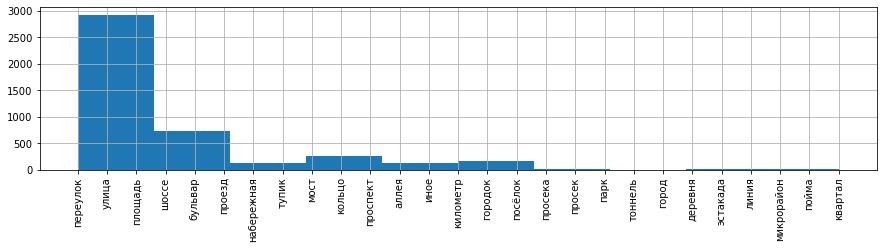

In [34]:
plt.figure(figsize =(15, 3))
plt.xticks(rotation = 90)
plt.hist(df['street_category'])
plt.grid()

И еще можно посмотреть, распределение категорий по районам:

In [37]:
cat_in_okrug = df.groupby(['okrug', 'street_category'])['streetname'].count().reset_index()
cat_in_okrug['streetname'] = cat_in_okrug['streetname'].astype(int)
cat_in_okrug

,okrug,street_category,streetname
0,ВАО,аллея,9
1,ВАО,бульвар,6
2,ВАО,городок,1
3,ВАО,иное,8
4,ВАО,километр,27
...,...,...,...
153,ЮЗАО,проезд,19
154,ЮЗАО,проспект,22
155,ЮЗАО,тупик,1
156,ЮЗАО,улица,185


Сделаем в более компактном виде:

In [38]:
cat_in_okrug_p = cat_in_okrug.pivot(index='street_category', columns='okrug', values='streetname').fillna(0)
cat_in_okrug_p

okrug,ВАО,ЗАО,Зеленоград,САО,СВАО,СЗАО,ЦАО,ЮАО,ЮВАО,ЮЗАО
street_category,,,,,,,,,,
аллея,9.0,11.0,7.0,15.0,4.0,2.0,0.0,0.0,1.0,3.0
бульвар,6.0,4.0,0.0,8.0,3.0,6.0,22.0,9.0,13.0,7.0
город,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
городок,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
деревня,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
иное,8.0,7.0,28.0,5.0,6.0,7.0,0.0,5.0,3.0,3.0
квартал,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0
километр,27.0,19.0,0.0,9.0,18.0,21.0,0.0,16.0,10.0,14.0
кольцо,7.0,2.0,0.0,8.0,6.0,3.0,2.0,4.0,5.0,3.0


Так, здесь, кажется, есть кое-что интересное...

Для более наглядного отображения построим карту распределения:

In [35]:
import seaborn as sns

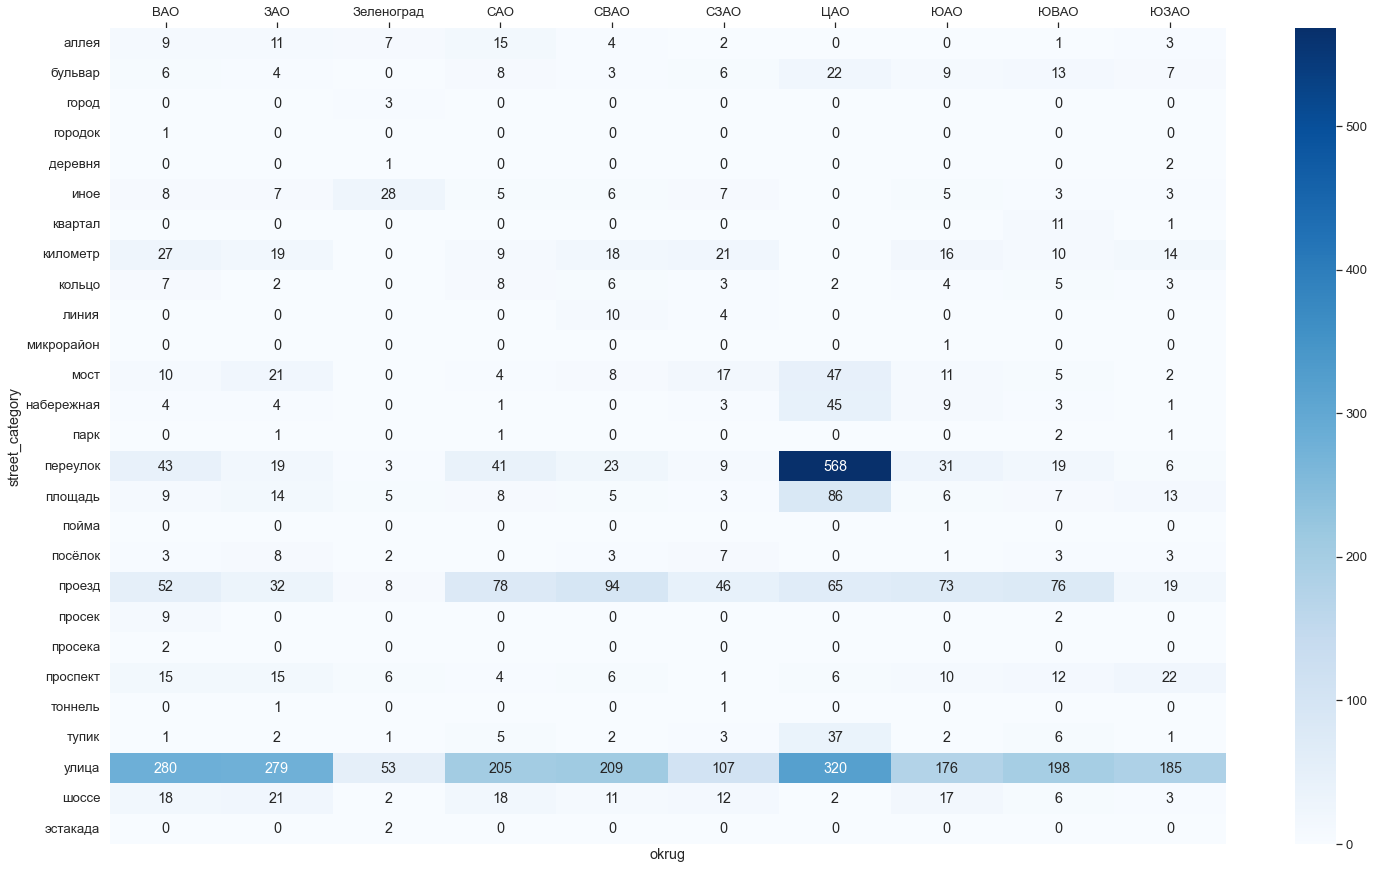

In [39]:
f,ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale = 1.2)
sns.heatmap(cat_in_okrug_p, annot=True, fmt= 'g', cmap="Blues")
ax.xaxis.set_ticks_position('top')


Хм... А вы знали, что в ЦАО больше переулков, чем улиц? И их в 10 раз больше, чем в других округах. Может быть, большое количество 'переулков' - это маркер исторического центра? Наверное, это вопрос к историкам. И еще про ЦАО: это единственный округ, где нет улиц, именованных не общепринятым способом.

А вот переулки ЦАО:

In [23]:
df.loc[(df['street_category'] == 'переулок') & (df['okrug'] == 'ЦАО')]

,streetname,areaid,okrug,area,street_category
0,Выставочный переулок,17,ЦАО,Пресненский район,переулок
3,Глубокий переулок,17,ЦАО,Пресненский район,переулок
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район,переулок
5,Малый Гнездниковский переулок,17,ЦАО,Пресненский район,переулок
10,Грузинский переулок,17,ЦАО,Пресненский район,переулок
...,...,...,...,...,...
4385,Благовещенский переулок,17,ЦАО,Пресненский район,переулок
4386,Богословский переулок,17,ЦАО,Пресненский район,переулок
4387,Большой Предтеченский переулок,17,ЦАО,Пресненский район,переулок
4394,Волков переулок,17,ЦАО,Пресненский район,переулок




На этом, пожалуй, все. Надеюсь, вам было интересно! :-D